In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

/tmp/ipykernel_91951/711202438.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data/td001_dpe-clean.csv')
df = pd.DataFrame(data)
df

/tmp/ipykernel_91951/74097000.py:1: DtypeWarning: Columns (8,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/td001_dpe-clean.csv')


,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,surface_baies_orientees_sud,surface_planchers_hauts_deperditifs,surface_planchers_bas_deperditifs,surface_parois_verticales_opaques_deperditives,etat_avancement,organisme_certificateur,adresse_organisme_certificateur,dpe_vierge,est_efface,date_reception_dpe
0,176,1375V2000001D,2159,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-10,...,0.0,0.0,0.0,0.00,1,DEKRA Certification,3/5 avenue Garlande 92220 BAGNEUX (détail sur ...,0.0,0,2013-04-11 04:00:00
1,219,1375V2000003F,2360,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-09,...,0.0,0.0,0.0,0.00,1,Bureau Veritas Certification - 60 avenue du Gé...,Le Guillaumet 92046 PARIS LA DEFENSE CEDEX (dé...,0.0,0,2013-04-12 04:00:00
2,220,1375V2000004G,2360,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-10,...,0.0,0.0,0.0,0.00,1,Bureau Veritas Certification - 60 avenue du Gé...,Le Guillaumet 92046 PARIS LA DEFENSE CEDEX (dé...,0.0,0,2013-04-12 04:00:00
3,248,1375V2000008K,1698,5,2,FACTURE,VERSION_2012,NaN,NaN,2013-04-04,...,0.0,0.0,0.0,0.00,1,I.Cert,parc EDONIA - bâtiment G - rue de la terre Vic...,0.0,0,2013-04-12 04:00:00
4,250,1375V2000009L,2360,3,2,Méthode Facture,NaN,NaN,NaN,2013-04-11,...,0.0,0.0,0.0,0.00,1,Bureau Veritas Certification - 60 avenue du Gé...,Le Guillaumet 92046 PARIS LA DEFENSE CEDEX (dé...,0.0,0,2013-04-12 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298144,9431398,2075N1000360A,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:56:50
298145,9431399,2075N1000361B,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:56:58
298146,9431400,2075N1000362C,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:57:06
298147,9431403,2075N1000363D,17511,10,11,FACTURE - DPE,V2012,Th-BCE 2012,7502,2020-03-05,...,NaN,NaN,NaN,NaN,1,QUALIXPERT,"LCC 17 rue Borrel, 81100 CASTRES",0.0,0,2020-03-10 13:57:15


In [3]:
info = data.info()
type(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298149 entries, 0 to 298148
Data columns (total 67 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              298149 non-null  int64  
 1   numero_dpe                                      298149 non-null  object 
 2   usr_diagnostiqueur_id                           298149 non-null  int64  
 3   usr_logiciel_id                                 298149 non-null  int64  
 4   tr001_modele_dpe_id                             298149 non-null  int64  
 5   nom_methode_dpe                                 298149 non-null  object 
 6   version_methode_dpe                             185134 non-null  object 
 7   nom_methode_etude_thermique                     13728 non-null   object 
 8   version_methode_etude_thermique                 12447 non-null   object 
 9   date_visite_diagnostiqueur

NoneType

In [4]:
# extract the df columns being objects
obj_df = df.select_dtypes('object').copy()
display(obj_df.shape)
obj_df.head()
obj_df.code_postal.describe()

(298149, 31)

count     296280
unique      2819
top        75015
freq       30289
Name: code_postal, dtype: object

In [5]:
list(df.select_dtypes('object').columns)

['numero_dpe',
 'nom_methode_dpe',
 'version_methode_dpe',
 'nom_methode_etude_thermique',
 'version_methode_etude_thermique',
 'date_visite_diagnostiqueur',
 'date_etablissement_dpe',
 'date_arrete_tarifs_energies',
 'commentaires_ameliorations_recommandations',
 'explication_personnalisee',
 'classe_consommation_energie',
 'classe_estimation_ges',
 'secteur_activite',
 'commune',
 'arrondissement',
 'type_voie',
 'nom_rue',
 'numero_rue',
 'batiment',
 'escalier',
 'etage',
 'porte',
 'code_postal',
 'code_insee_commune',
 'code_insee_commune_actualise',
 'numero_lot',
 'surface_commerciale_contractuelle',
 'partie_batiment',
 'organisme_certificateur',
 'adresse_organisme_certificateur',
 'date_reception_dpe']

In [6]:
obj_df.columns

Index(['numero_dpe', 'nom_methode_dpe', 'version_methode_dpe',
       'nom_methode_etude_thermique', 'version_methode_etude_thermique',
       'date_visite_diagnostiqueur', 'date_etablissement_dpe',
       'date_arrete_tarifs_energies',
       'commentaires_ameliorations_recommandations',
       'explication_personnalisee', 'classe_consommation_energie',
       'classe_estimation_ges', 'secteur_activite', 'commune',
       'arrondissement', 'type_voie', 'nom_rue', 'numero_rue', 'batiment',
       'escalier', 'etage', 'porte', 'code_postal', 'code_insee_commune',
       'code_insee_commune_actualise', 'numero_lot',
       'surface_commerciale_contractuelle', 'partie_batiment',
       'organisme_certificateur', 'adresse_organisme_certificateur',
       'date_reception_dpe'],
      dtype='object')

In [7]:
obj_df.date_reception_dpe.value_counts()

date_reception_dpe
2013-07-18 04:00:00    187
2013-07-16 04:00:00    172
2013-07-23 04:00:00    160
2013-07-01 04:00:00    155
2013-07-10 04:00:00    146
                      ... 
2015-10-28 21:12:01      1
2015-10-28 21:13:16      1
2015-10-28 21:21:06      1
2015-10-28 22:05:09      1
2020-03-10 13:59:08      1
Name: count, Length: 290232, dtype: int64

In [8]:
num_df = df.select_dtypes('number').copy()
num_df.describe()
num_df.columns

Index(['id', 'usr_diagnostiqueur_id', 'usr_logiciel_id', 'tr001_modele_dpe_id',
       'consommation_energie', 'estimation_ges', 'tr002_type_batiment_id',
       'tr012_categorie_erp_id', 'tr013_type_erp_id', 'annee_construction',
       'surface_habitable', 'surface_thermique_lot', 'tv016_departement_id',
       'portee_dpe_batiment', 'shon', 'surface_utile',
       'surface_thermique_parties_communes', 'en_souterrain', 'en_surface',
       'nombre_niveaux', 'nombre_circulations_verticales', 'nombre_boutiques',
       'presence_verriere', 'surface_verriere', 'type_vitrage_verriere',
       'nombre_entrees_avec_sas', 'nombre_entrees_sans_sas',
       'surface_baies_orientees_nord', 'surface_baies_orientees_est_ouest',
       'surface_baies_orientees_sud', 'surface_planchers_hauts_deperditifs',
       'surface_planchers_bas_deperditifs',
       'surface_parois_verticales_opaques_deperditives', 'etat_avancement',
       'dpe_vierge', 'est_efface'],
      dtype='object')

In [9]:
num_df.surface_habitable

0          54.00
1          23.86
2          54.89
3          38.90
4          80.00
           ...  
298144     94.55
298145     43.30
298146    109.55
298147     94.55
298148     80.00
Name: surface_habitable, Length: 298149, dtype: float64

In [10]:
obj_df.surface_commerciale_contractuelle.unique()

array([nan, 100.0, 45.49, 45.0, 30.0, 23.0, 0.0, 35.0, '0', '100', '23',
       '17.65', '400', '30;11', '42,85', '43,4', '25,95', '9.13', '55',
       '516.45', '31,2', '82,69', '157.44', '62,28', 33.0, 50.0, ' ',
       '314,84', '160', '30', '230', '250', '70,18', '33,18', '61,45',
       '41', '82.5', '68,65', '62', '29,65', '75', '78,47', '93.72',
       '122,25', '67,1', '9', 300.0, 450.0, 445.0, 150.93, '22,04',
       '57,18', 183.0, 90.0, 365.0, 154.0, 74.0, '59,4', '3783', 370.0,
       '790,33', '/', 229.0, 40.0, 434.0], dtype=object)

<Axes: >

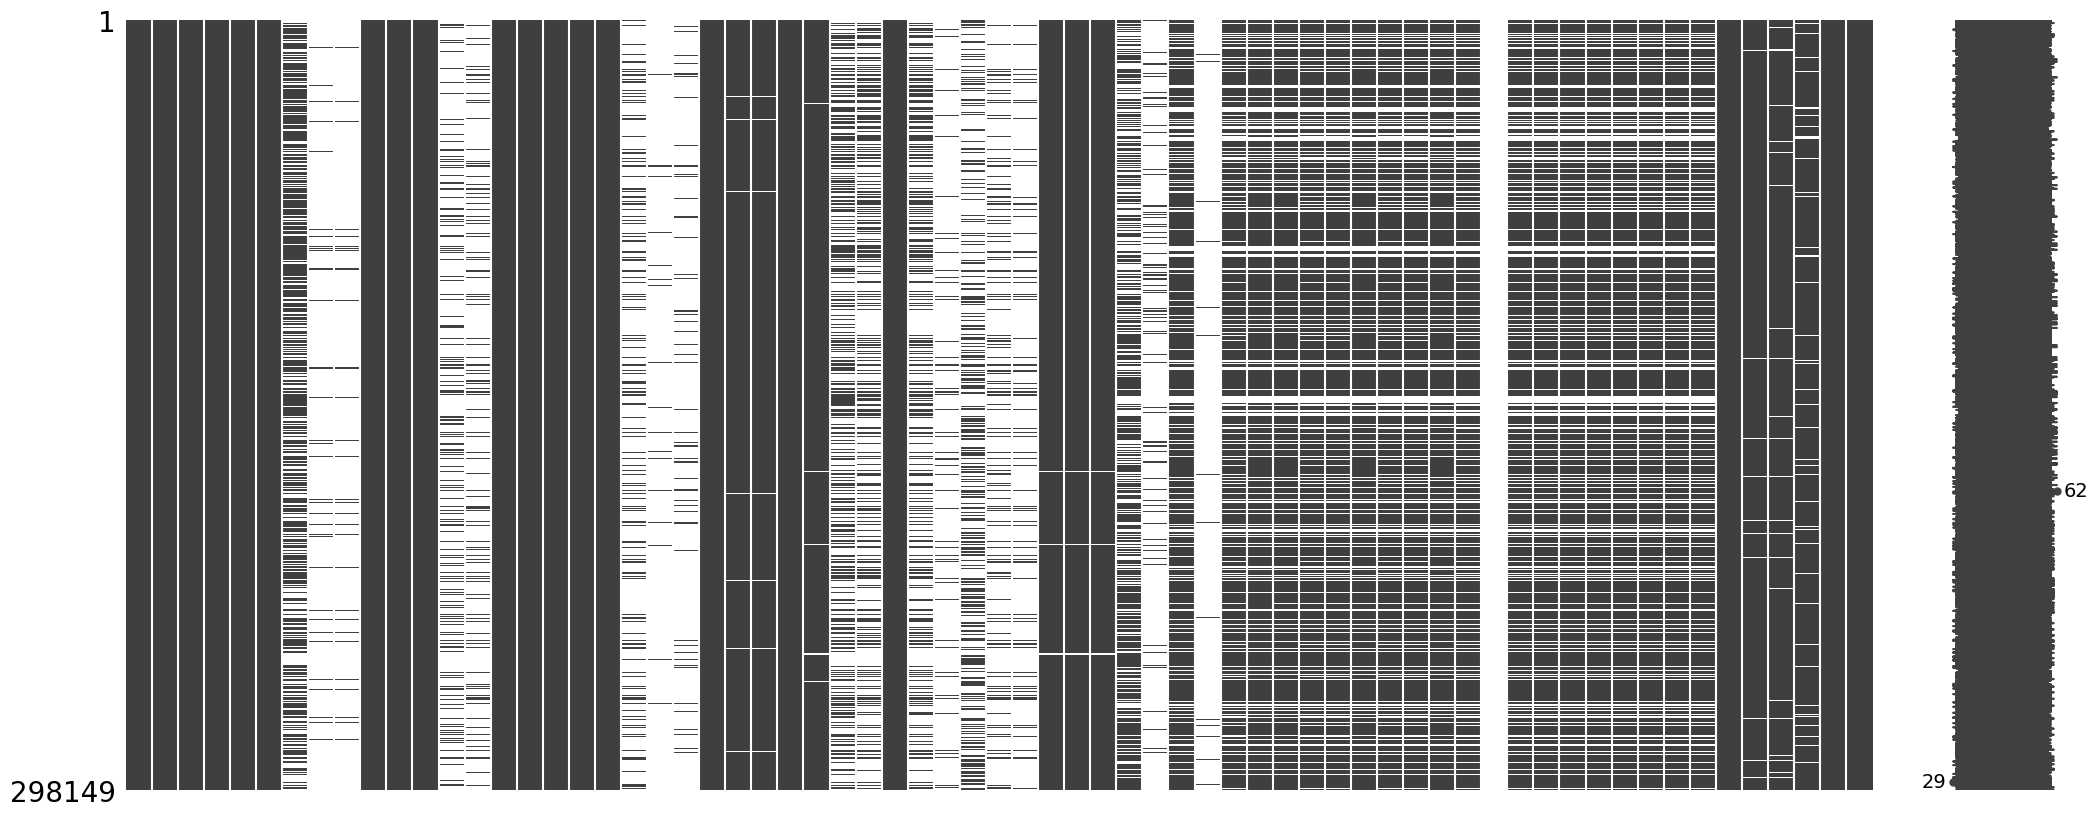

In [11]:
msno.matrix(df)

In [12]:
df.describe()

,id,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,consommation_energie,estimation_ges,tr002_type_batiment_id,tr012_categorie_erp_id,tr013_type_erp_id,annee_construction,...,nombre_entrees_sans_sas,surface_baies_orientees_nord,surface_baies_orientees_est_ouest,surface_baies_orientees_sud,surface_planchers_hauts_deperditifs,surface_planchers_bas_deperditifs,surface_parois_verticales_opaques_deperditives,etat_avancement,dpe_vierge,est_efface
count,2.981490e+05,298149.000000,298149.000000,298149.000000,2.981490e+05,298149.000000,298149.000000,6767.000000,25679.000000,298149.000000,...,231748.000000,232106.000000,232106.000000,232106.000000,232106.00000,232106.000000,232106.000000,298149.0,281212.000000,298149.0
mean,4.220424e+06,9961.519482,5.780573,5.608545,1.993569e+02,26.498482,2.223251,2.702675,18.770085,1903.619378,...,0.000043,1.526707,2.174904,1.534249,12.50352,12.605720,16.740017,1.0,0.349740,0.0
std,2.672787e+06,5342.890825,3.842734,4.429324,6.598350e+03,1520.304753,0.658307,1.890741,7.683854,322.664569,...,0.007772,21.264331,33.280133,23.461626,69.66437,87.985748,192.481539,0.0,0.476889,0.0
min,1.760000e+02,1.000000,1.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-140.330000,1.0,0.000000,0.0
25%,1.882276e+06,5724.000000,3.000000,2.000000,0.000000e+00,0.000000,2.000000,1.000000,12.000000,1947.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.0
50%,4.062849e+06,9952.000000,3.000000,2.000000,1.629700e+02,11.900000,2.000000,1.000000,23.000000,1947.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.0
75%,6.368484e+06,14223.000000,10.000000,10.000000,2.700000e+02,36.120000,2.000000,5.000000,23.000000,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,1.000000,0.0
max,9.431414e+06,22627.000000,16.000000,24.000000,3.110395e+06,727825.460000,5.000000,5.000000,30.000000,32767.000000,...,2.000000,3708.000000,4510.660000,1758.000000,8885.00000,17075.000000,51090.000000,1.0,1.000000,0.0


In [13]:
_prediction_label_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Correspondance entre catégoriel et int8
int_to_cat = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
}
# Mapping categories to int
cat_to_int = {v: k for k, v in int_to_cat.items()}
_prediction_label_int = list(int_to_cat)

# Construction des données
# _change_column_names = {'date_visite_diagnostiqueur':'datetime64[ns]', 
#                         'date_etablissement_dpe':'datetime64[ns]',
#                         'date_arrete_tarifs_energies':'datetime64[ns]',
#                         'code_postal':'string',
#                         'code_insee_commune':'string',
#                         'code_insee_commune_actualise':'string',
#                         'date_reception_dpe':'datetime64[ns]'}
def _get_data(path, f_name):

    data = pd.read_csv(os.path.join(path, 'data', f_name))

    target_column_name = 'classe_consommation_energie'

    ignore_column_names = ['id', 'numero_dpe', 'version_methode_dpe',
                            'nom_methode_etude_thermique', 'version_methode_etude_thermique',
                            'commentaires_ameliorations_recommandations',
                            'explication_personnalisee', 'estimation_ges',
                            'classe_estimation_ges', 'nom_rue', 'numero_rue',
                            'batiment', 'escalier', 'etage', 'porte', 'numero_lot',
                            'partie_batiment', 'adresse_organisme_certificateur'
                            ]

    # y_array = data[target_column_name]
    
    #drop columns of X_df
    X_df = data.drop([target_column_name] + ignore_column_names, axis=1)
    # y_array = y_array.map(cat_to_int).fillna(-1).astype("int8").values
    y = np.array(data[target_column_name].map(cat_to_int).fillna(-1).astype("int8"))
    X = X_df

    return X, y


def get_train_data(path='.'):
    f_name = 'train.csv'
    return _get_data(path, f_name)


def get_test_data(path='.'):
    f_name = 'test.csv'
    return _get_data(path, f_name)

In [14]:
trainX, trainy = get_train_data()
testX, testy = get_test_data()

/tmp/ipykernel_91951/3852917919.py:27: DtypeWarning: Columns (23,24,25,36,39,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))
/tmp/ipykernel_91951/3852917919.py:27: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))


In [15]:
ignore_column_names = ['id', 'numero_dpe', 'version_methode_dpe',
                        'nom_methode_etude_thermique', 'version_methode_etude_thermique',
                        'commentaires_ameliorations_recommandations',
                        'explication_personnalisee', 'estimation_ges',
                        'classe_estimation_ges', 'nom_rue', 'numero_rue',
                        'batiment', 'escalier', 'etage', 'porte', 'numero_lot',
                        'partie_batiment', 'adresse_organisme_certificateur'
                        ]
trainX.head()

,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,date_visite_diagnostiqueur,date_etablissement_dpe,date_arrete_tarifs_energies,consommation_energie,tr002_type_batiment_id,secteur_activite,...,surface_baies_orientees_est_ouest,surface_baies_orientees_sud,surface_planchers_hauts_deperditifs,surface_planchers_bas_deperditifs,surface_parois_verticales_opaques_deperditives,etat_avancement,organisme_certificateur,dpe_vierge,est_efface,date_reception_dpe
0,17630,10,10,FACTURE - DPE,2018-07-30,2018-07-30,2015-08-15,488.66,2,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,QUALIT'COMPETENCES CERTIFICATION,0.0,0.0,2018-07-30 19:00:20
1,4305,10,10,FACTURE - DPE,2015-11-04,2015-11-04,2011-08-15,323.05,2,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,BUREAU VERITAS CERTIFICATION,0.0,0.0,2015-11-05 06:09:11
2,734,3,2,Méthode Facture,2015-07-17,2015-07-20,2011-09-15,704.0,2,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,"VERITAS, 60, avenue Charles De GAULLE, 92046 P...",0.0,0.0,2015-07-20 23:06:11
3,9776,13,2,FACTURE SEULE,2014-06-05,2014-06-10,2011-08-15,146.62,2,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,Bureau Veritas Certification,0.0,0.0,2014-06-10 23:52:56
4,15372,3,10,Méthode Facture,2016-12-23,2016-12-25,2011-09-15,0.0,2,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,QUALIT COMPETENCES CERTIFICATIONS,1.0,0.0,2016-12-25 21:58:01


In [16]:
len(trainX.columns),len(testX.columns)

(48, 48)

In [17]:
trainX.shape, testX.shape, testX.shape, testy.shape

((158750, 48), (65347, 48), (65347, 48), (65347,))

In [27]:
from sklearn.model_selection import ShuffleSplit
def get_cv(X, y):
    cv = ShuffleSplit(n_splits=8, test_size=0.2, random_state=42)
    return cv.split(X, y)

In [33]:
for i, (train_index, test_index) in enumerate(get_cv(trainX, trainy)):
    print(train_index, test_index)
    print(trainX.iloc[train_index].shape, trainX.iloc[test_index].shape)


[152503  45402 129962 ... 131932 146867 121958] [114712  97878 106461 ... 118056  34088 133904]
(127000, 48) (31750, 48)
[ 82603 117977 102941 ...  24900 103488  67865] [ 60843  21494  95492 ... 141651  48094 134695]
(127000, 48) (31750, 48)
[ 43503  90919  47024 ...  54006 150104  84807] [ 62920 100977 153245 ...  85083 133503 113969]
(127000, 48) (31750, 48)
[114047  70977 149514 ... 102576 137369  33327] [ 10270  13493  76477 ... 156938  94413 109424]
(127000, 48) (31750, 48)
[ 98562 128785 117241 ... 113664    170   2592] [78182 76042 72783 ... 95568 46096 75613]
(127000, 48) (31750, 48)
[ 75497  39968  34493 ... 101241  50744  71236] [ 26126  60081 129344 ...  44045  43940 151552]
(127000, 48) (31750, 48)
[144513 121698  83815 ...  55434  23518 158300] [112995 120336  98759 ...  37485 129181 120410]
(127000, 48) (31750, 48)
[ 56902 100589   5236 ...   9152  62428  30437] [94203 70996 55407 ... 38156 63936  1516]
(127000, 48) (31750, 48)


In [18]:
trainX_num = trainX.select_dtypes('number').copy()
trainX_num.columns

Index(['portee_dpe_batiment', 'shon', 'surface_utile',
       'surface_thermique_parties_communes', 'en_souterrain', 'en_surface',
       'nombre_niveaux', 'nombre_circulations_verticales',
       'type_vitrage_verriere', 'surface_baies_orientees_nord',
       'surface_baies_orientees_est_ouest', 'surface_baies_orientees_sud',
       'surface_planchers_hauts_deperditifs',
       'surface_planchers_bas_deperditifs',
       'surface_parois_verticales_opaques_deperditives', 'etat_avancement',
       'dpe_vierge', 'est_efface'],
      dtype='object')

In [40]:
trainX.columns

Index(['usr_diagnostiqueur_id', 'usr_logiciel_id', 'tr001_modele_dpe_id',
       'nom_methode_dpe', 'date_visite_diagnostiqueur',
       'date_etablissement_dpe', 'date_arrete_tarifs_energies',
       'consommation_energie', 'tr002_type_batiment_id', 'secteur_activite',
       'tr012_categorie_erp_id', 'tr013_type_erp_id', 'annee_construction',
       'surface_habitable', 'surface_thermique_lot', 'tv016_departement_id',
       'commune', 'arrondissement', 'type_voie', 'code_postal',
       'code_insee_commune', 'code_insee_commune_actualise',
       'surface_commerciale_contractuelle', 'portee_dpe_batiment', 'shon',
       'surface_utile', 'surface_thermique_parties_communes', 'en_souterrain',
       'en_surface', 'nombre_niveaux', 'nombre_circulations_verticales',
       'nombre_boutiques', 'presence_verriere', 'surface_verriere',
       'type_vitrage_verriere', 'nombre_entrees_avec_sas',
       'nombre_entrees_sans_sas', 'surface_baies_orientees_nord',
       'surface_baies_orientees

In [41]:
lista = list()
for i in ['code_postal', 'code_insee_commune']:
    lista.append(list(trainX.columns).index(i))
lista

[19, 20]

In [42]:
lista = list()
for i in ['portee_dpe_batiment', 'shon', 'surface_utile',
                                            'surface_thermique_parties_communes', 'en_souterrain', 'en_surface',
                                            'nombre_niveaux', 'nombre_circulations_verticales',
                                            'type_vitrage_verriere', 'surface_baies_orientees_nord',
                                            'surface_baies_orientees_est_ouest', 'surface_baies_orientees_sud',
                                            'surface_planchers_hauts_deperditifs',
                                            'surface_planchers_bas_deperditifs',
                                            'surface_parois_verticales_opaques_deperditives', 'etat_avancement',
                                            'dpe_vierge', 'est_efface']:
    lista.append(list(trainX.columns).index(i))
lista

[23, 24, 25, 26, 27, 28, 29, 30, 34, 37, 38, 39, 40, 41, 42, 43, 45, 46]

In [50]:
# count unique values of np.array
np.unique(trainy)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int8)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

class UniformingdType(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.astype(object)
        return X

class toStr(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.astype(str)
        return X


class Classifier(BaseEstimator):
    def __init__(self):
        # Definir les imputers et les scalers.
        qual_imputer = SimpleImputer(strategy="most_frequent")
        quant_imputer = SimpleImputer(strategy="mean")
        scaler = StandardScaler()

        # Transformations.
        qual_transform = Pipeline(steps=[
            ("previus", UniformingdType()),
            ("imputer", qual_imputer),
            ("toStr", toStr()),
            ("encoder", OneHotEncoder(handle_unknown='ignore'))
        ])

        quant_transform = Pipeline(steps=[
            ("imputer", quant_imputer),
            ("scaler", scaler)
        ])

        # ColumnTransformer para apliquer des transformations
        # differentes a les columnes.
        self.transformer = ColumnTransformer(
            transformers=[
                ("qual", qual_transform, [19, 20]),  
                ("quant", quant_transform, [23, 24, 25, 26, 27, 28, 29, 30, 34, 37, 38, 39, 40, 41, 42, 43, 45, 46]),  
            ],
            remainder='drop'  
        )

        # Definir le model de clasification.
        self.model = LogisticRegression(max_iter=1000, random_state=42)

        # Construction du pipeline complet.
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)

In [20]:
# # Convert columns with mixed data types to a single data type
# df['code_postal'] = df['code_postal'].astype(str)
# df['code_insee_commune'] = df['code_insee_commune'].astype(str)
# Y = df['classe_consommation_energie']
# X = df.drop(['classe_consommation_energie'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X.shape

In [21]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((158750, 48), (158750,), (65347, 48), (65347,))

In [22]:
from sklearn.metrics import accuracy_score

clasifier = Classifier()
clasifier.fit(trainX, trainy)
y_pred = clasifier.predict(testX)
accuracy_score(testy, y_pred)

0.5134283134650405

In [23]:
clasifier.pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('qual',
                                                  Pipeline(steps=[('previus',
                                                                   UniformingdType()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['code_postal',
                                                   'code_insee_commune']),
                                                 ('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [...
                                                   'type_vitrage_verriere',
                                                   'surface_baies_orientees_nord',
                                                   'surface_baies_orientees_est_ouest',
                                                   'surface_baies_orientees_sud',
                                                   'surface_planchers_hauts_deperditifs',
                                                   'surface_planchers_bas_deperditifs',
                                                   'surface_parois_verticales_opaques_deperditives',
                                                   'etat_avancement',
                                                   'dpe_vierge',
                                                   'est_efface'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [25]:
!ramp-test --submission starting_kit

Testing Energetic class prediction for housing in Paris
Reading train and test files from ./data/ ...
./problem.py:55: DtypeWarning: Columns (23,24,25,36,39,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))
./problem.py:55: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))
./problem.py:55: DtypeWarning: Columns (23,24,25,36,39,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
Traceback (most recent call last):

  File "/home/julian/miniconda3/envs/DPE-75/lib/python3.9/site-packages/rampwf/utils/submission.py", line 121, in train_test_submission
    trained_model = problem.workflow.train_submission(

  File "/home/julian/miniconda3/envs/DPE-75/li